# Kaggle Exploratory Data Analysis/Visualization

For finance, I did that separately because the data was prepared somewhat differently.

For the data visualization part, the datasets are too large but we'll focus on individual stocks to visualize.

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
sns.set_style("whitegrid")


In [9]:
diffs = list(health.columns[-3:])

In [152]:
diffs

['diff_fomc', 'diff_fcmo', 'diff_vol']

In [49]:
metrics= list(tech.columns[3:])
metrics.remove('y')

In [59]:
trunc_metrics = ['Friday_high','Friday_volume','diff_fomc','diff_fcmo','diff_vol']

### Health Sector

In [11]:
health=pd.read_csv('data/Weekends_Health_Stocks.csv')

In [12]:
health['diff_fomc'] = (health['Friday_open']-health['Monday_close'])/health['Friday_open']

In [13]:
health['diff_fcmo'] = (health['Friday_close']-health['Monday_open'])/health['Friday_close']

In [14]:
health['diff_vol'] = (health['Friday_volume']-health['Monday_volume'])/health['Friday_volume']

In [27]:
means=[]
stdev=[]
for diff in diffs:
    x_non_dst = health.loc[health.y==0][diff].values
    x_dst = health.loc[health.y==1][diff].values
    
    means.append([np.mean(x_non_dst),np.mean(x_dst)])
    stdev.append([np.std(x_non_dst),np.std(x_dst)])

In [28]:
# Means
pd.DataFrame(means, index= diffs, columns = ['nonDST','DST'])

nonDST       DST
diff_fomc -0.010914 -0.008665
diff_fcmo -0.011481 -0.006038
diff_vol  -1.065139 -0.895187

In [29]:
# Standard Deviation
pd.DataFrame(stdev, index= diffs, columns = ['nonDST','DST'])

nonDST        DST
diff_fomc   3.005940   0.231379
diff_fcmo   3.030763   0.217603
diff_vol   28.625346  14.741246

In [64]:
UNH=health[health['ticker']=='UNH']

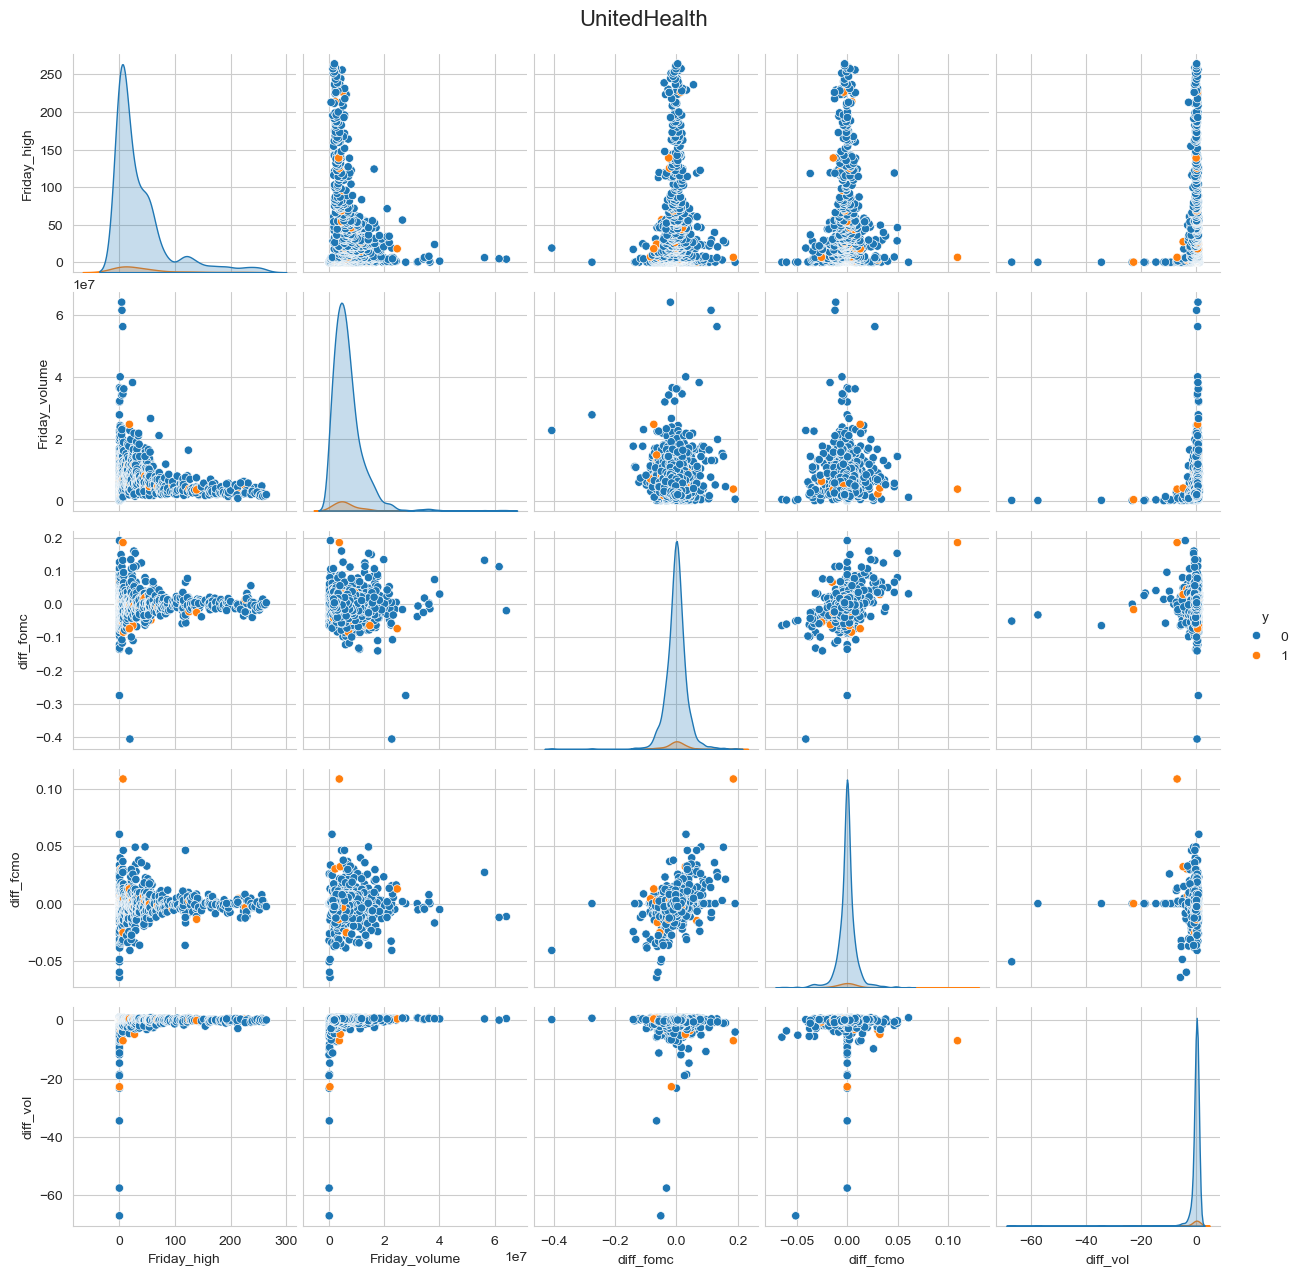

In [88]:
sns.pairplot(data = UNH,
                x_vars = trunc_metrics,
                y_vars = trunc_metrics,
                hue = 'y')
plt.suptitle("UnitedHealth", y=1.02, fontsize=16)
plt.show()

### Tech

In [19]:
tech=pd.read_csv('data/Weekends_Tech_Stocks.csv')

In [20]:
tech['diff_fomc'] = (tech['Friday_open']-tech['Monday_close'])/tech['Friday_open']

In [21]:
tech['diff_fcmo'] = (tech['Friday_close']-tech['Monday_open'])/tech['Friday_close']

In [22]:
tech['diff_vol'] = (tech['Friday_volume']-tech['Monday_volume'])/tech['Friday_volume']

In [30]:
means=[]
stdev=[]
for diff in diffs:
    non_dst = tech.loc[tech.y==0][diff].values
    dst = tech.loc[tech.y==1][diff].values
    
    means.append([np.mean(non_dst),np.mean(dst)])
    stdev.append([np.std(non_dst),np.std(dst)])

In [31]:
# Means
pd.DataFrame(means, index= diffs, columns = ['nonDST','DST'])

nonDST       DST
diff_fomc -0.032774 -0.000774
diff_fcmo -0.033012 -0.000032
diff_vol  -1.132314 -0.648536

In [32]:
# Standard Deviation
pd.DataFrame(stdev, index= diffs, columns = ['nonDST','DST'])

nonDST       DST
diff_fomc   4.546926  0.057416
diff_fcmo   4.630034  0.023717
diff_vol   72.394935  6.584542

In [41]:
apple=tech[tech['ticker']=='AAPL']

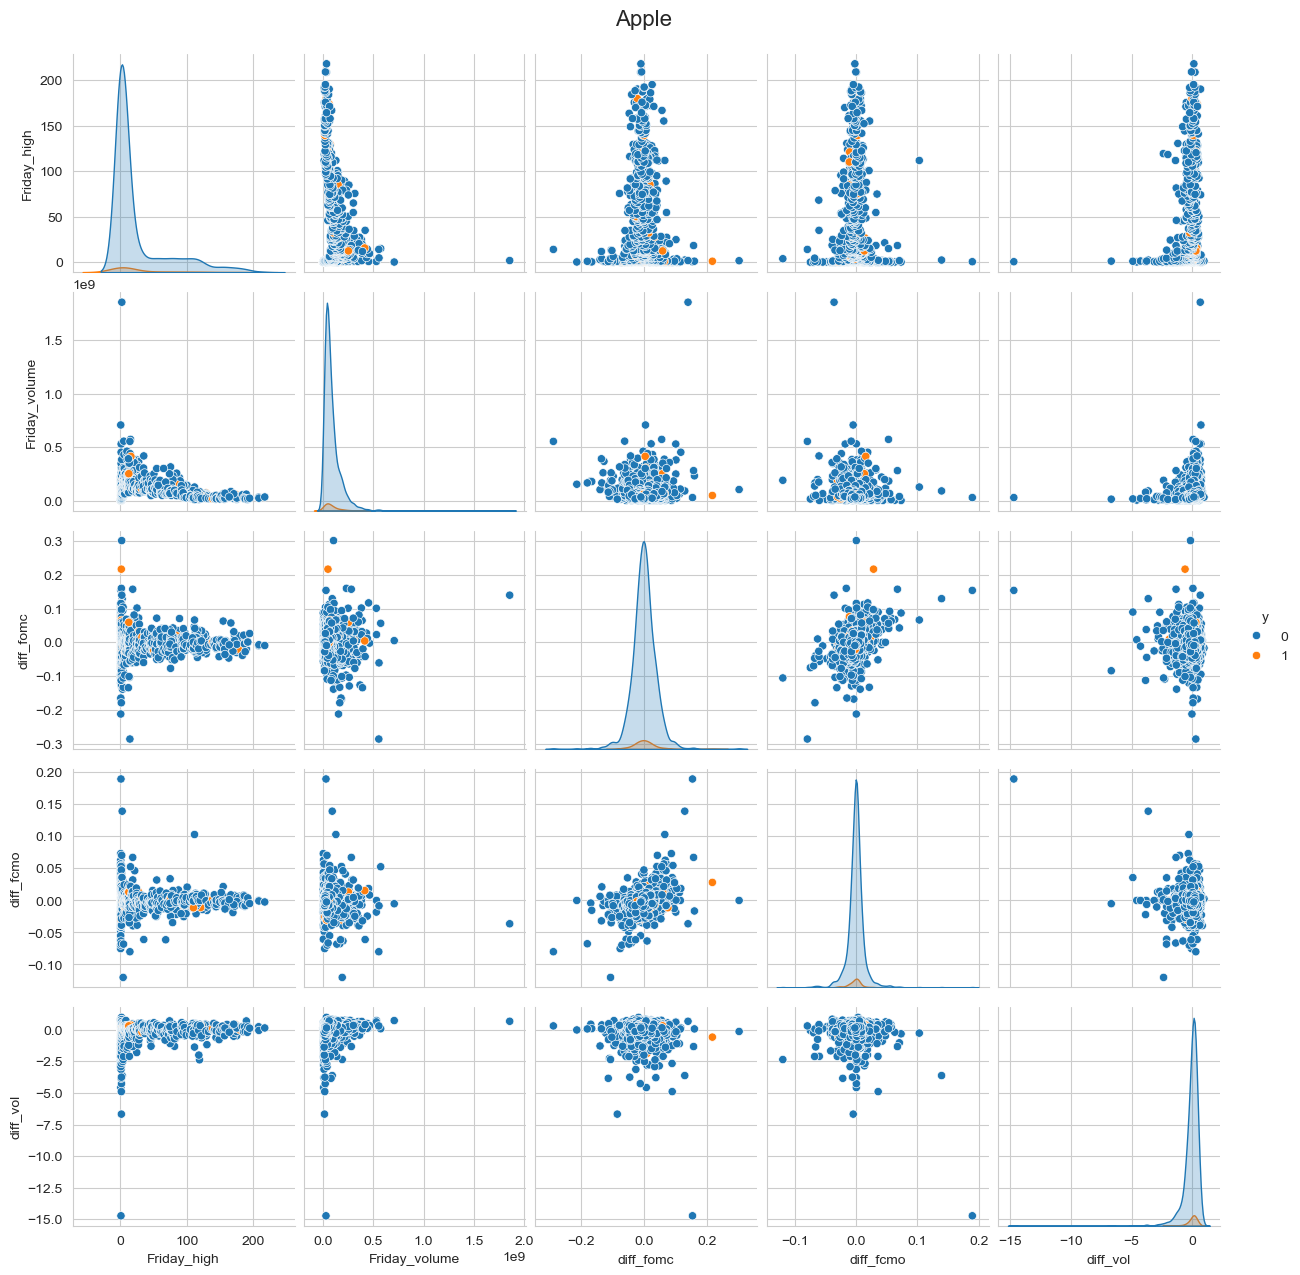

In [87]:
sns.pairplot(data = apple,
                x_vars = trunc_metrics,
                y_vars = trunc_metrics,
                hue = 'y')
plt.suptitle("Apple", y=1.02, fontsize=16)
plt.show()

In [90]:
microsoft=tech[tech['ticker']=='MSFT']

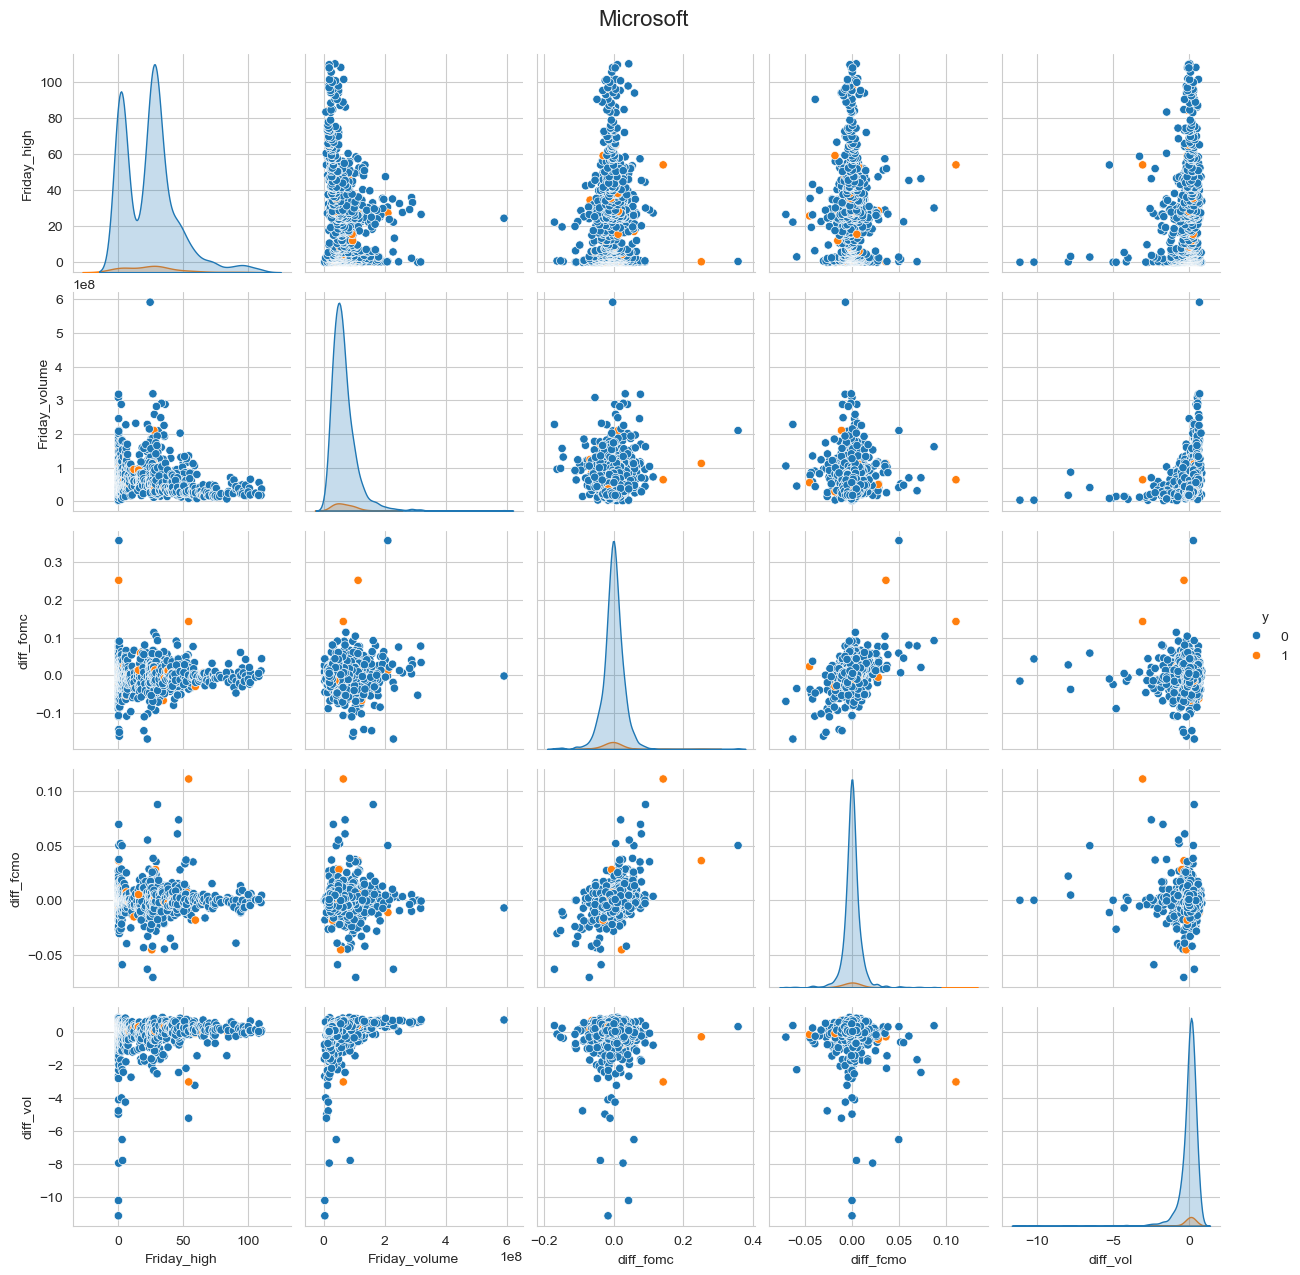

In [93]:
sns.pairplot(data = microsoft,
                x_vars = trunc_metrics,
                y_vars = trunc_metrics,
                hue = 'y')
plt.suptitle("Microsoft", y=1.02, fontsize=16)
plt.show()

In [98]:
google=tech[tech['ticker']=='GOOG']

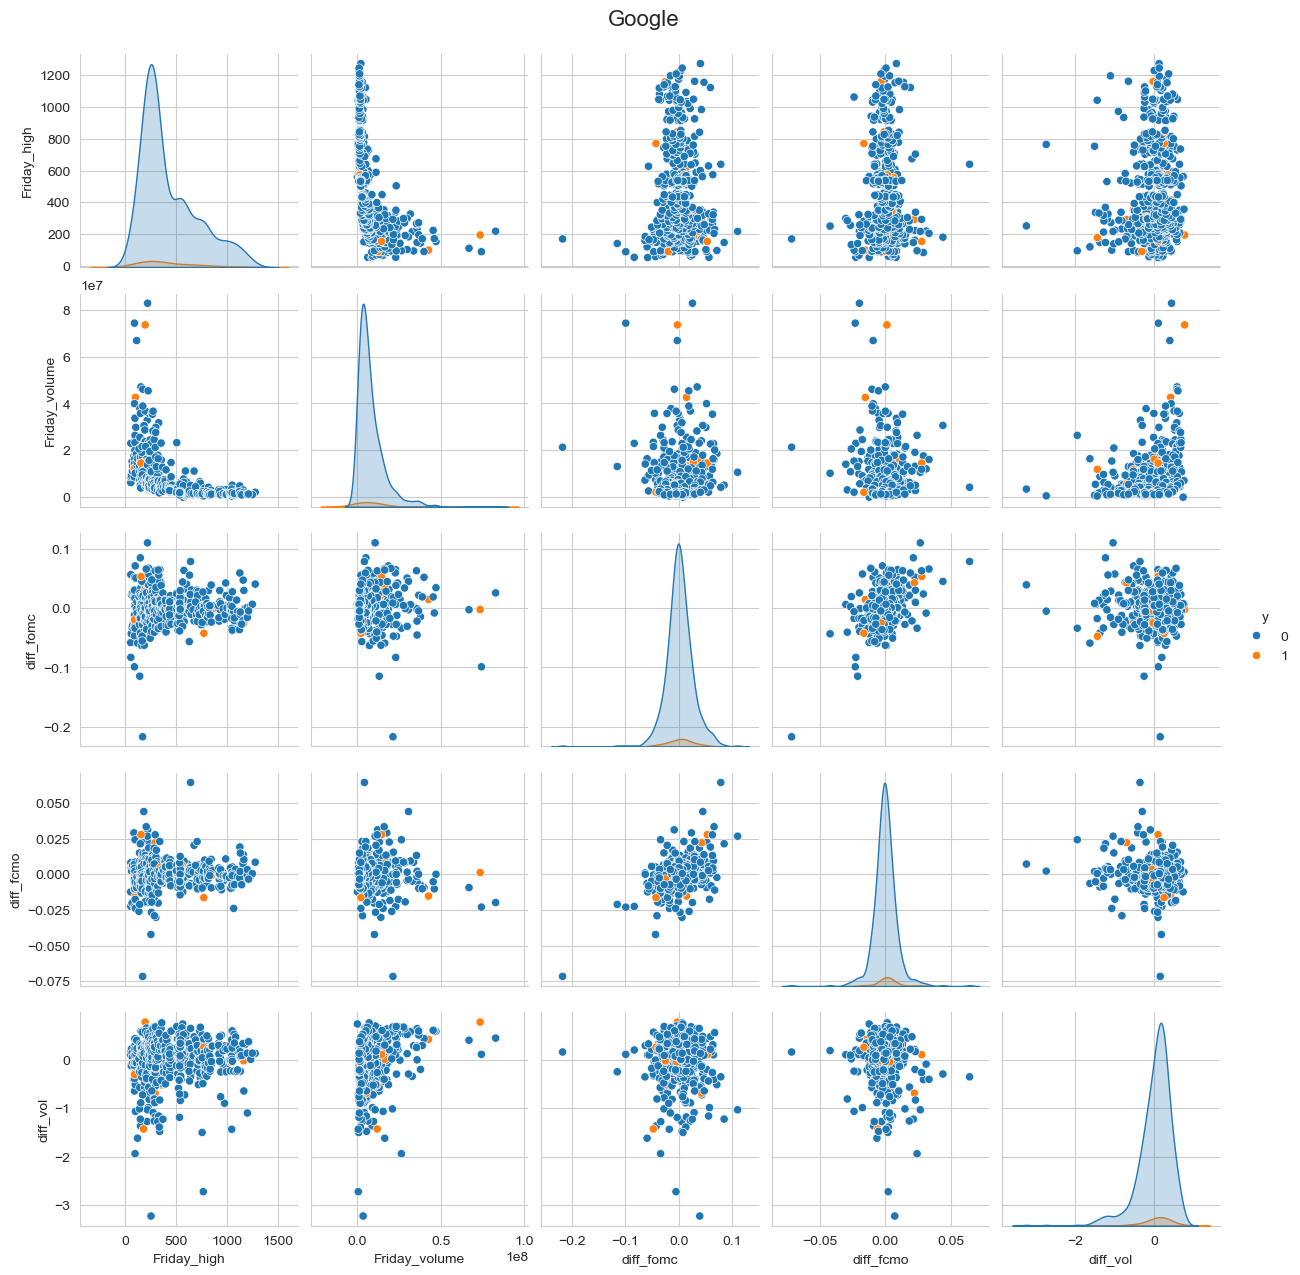

In [86]:
sns.pairplot(data = google,
                x_vars = trunc_metrics,
                y_vars = trunc_metrics,
                hue = 'y')
plt.suptitle("Google", y=1.02, fontsize=16)
plt.show()

In [95]:
pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 6.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [96]:
from prophet import Prophet

In [165]:
google_train=google.iloc[:607]

In [166]:
google_test=google.iloc[607:]

In [169]:
google_train_fomc = google_train[['Friday_date','diff_fomc']]

In [170]:
google_train_vol = google_train[['Friday_date','diff_vol']]

In [171]:
google_train_fomc['Friday_date'] = pd.to_datetime(google_train_fomc['Friday_date'], errors='coerce')

/var/folders/4l/xdk1tfxx7jbd3zsydcl3t4vh0000gn/T/ipykernel_20682/1623015680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_train_fomc['Friday_date'] = pd.to_datetime(google_train_fomc['Friday_date'], errors='coerce')


In [174]:
google_train_vol['Friday_date'] = pd.to_datetime(google_train_vol['Friday_date'], errors='coerce')

/var/folders/4l/xdk1tfxx7jbd3zsydcl3t4vh0000gn/T/ipykernel_20682/414839561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_train_vol['Friday_date'] = pd.to_datetime(google_train_vol['Friday_date'], errors='coerce')


In [176]:
# Rename specific columns
google_train_fomc.rename(columns={'Friday_date': 'ds', 'diff_fomc': 'y'}, inplace=True)

google_train_fomc.sample()


/var/folders/4l/xdk1tfxx7jbd3zsydcl3t4vh0000gn/T/ipykernel_20682/3994282897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_train_fomc.rename(columns={'Friday_date': 'ds', 'diff_fomc': 'y'}, inplace=True)


ds         y
146984 2013-10-25  0.013433

In [175]:
# Rename specific columns
google_train_vol.rename(columns={'Friday_date': 'ds', 'diff_vol': 'y'}, inplace=True)

google_train_vol.sample()


/var/folders/4l/xdk1tfxx7jbd3zsydcl3t4vh0000gn/T/ipykernel_20682/878106456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_train_vol.rename(columns={'Friday_date': 'ds', 'diff_vol': 'y'}, inplace=True)


ds         y
146878 2011-07-08  0.404795

In [177]:
m=Prophet()

In [178]:
n=Prophet()

In [179]:
m.fit(google_train_fomc)

22:10:07 - cmdstanpy - INFO - Chain [1] start processing
22:10:08 - cmdstanpy - INFO - Chain [1] done processing


In [180]:
n.fit(google_train_vol)

22:10:13 - cmdstanpy - INFO - Chain [1] start processing
22:10:13 - cmdstanpy - INFO - Chain [1] done processing


In [181]:
future_fomc=m.make_future_dataframe(periods=365)

In [182]:
forecast_fomc=m.predict(future_fomc)

In [194]:
forecast_fomc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[627:700:7]

ds      yhat  yhat_lower  yhat_upper
627 2018-01-05  0.003571   -0.027525    0.034956
634 2018-01-12  0.013605   -0.017368    0.044928
641 2018-01-19  0.018763   -0.013376    0.051382
648 2018-01-26  0.014400   -0.015201    0.046594
655 2018-02-02  0.004041   -0.029437    0.034787
662 2018-02-09 -0.003529   -0.035969    0.029636
669 2018-02-16 -0.002566   -0.035755    0.030205
676 2018-02-23  0.004508   -0.028187    0.036618
683 2018-03-02  0.010195   -0.023936    0.043545
690 2018-03-09  0.009524   -0.022402    0.042670
697 2018-03-16  0.004234   -0.027811    0.035932

In [209]:
google_test['Friday_date'] = pd.to_datetime(google_test['Friday_date'])

/var/folders/4l/xdk1tfxx7jbd3zsydcl3t4vh0000gn/T/ipykernel_20682/2632703643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_test['Friday_date'] = pd.to_datetime(google_test['Friday_date'])


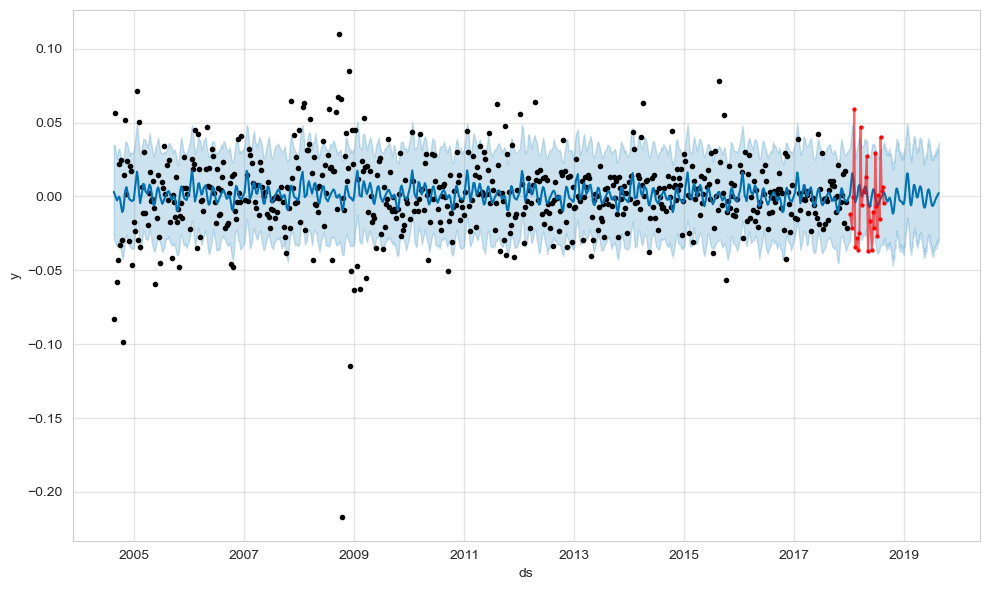

In [230]:
fig1=m.plot(forecast1)

plt.plot(google_test['Friday_date'],google_test['diff_fomc'],alpha=0.6,color='r')
plt.scatter(google_test['Friday_date'],google_test['diff_fomc'],s=4.5,alpha=0.9,color='r')
plt.show()

Above, I tried to train Prophet on data from Google's inception to the end of 2017, then had it predict the next two years. I then plotted the actual values of the fractional difference between Friday open and Monday close. At least the error ranges seem to be on the same scale as the actualy 2018 data. But also, it is fractional difference and so these are small numbers anyways.

We'll try with fractional difference in volume now.

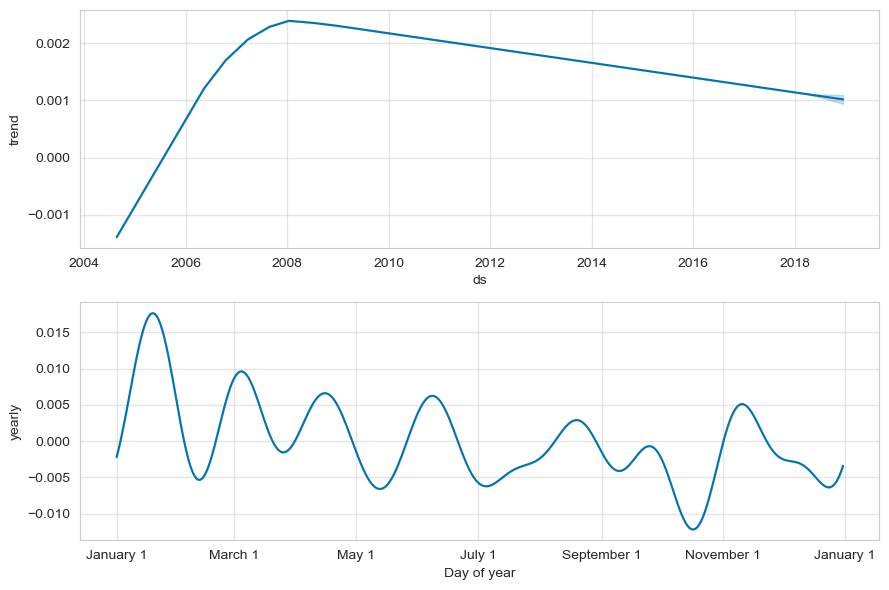

In [217]:
fig2=m.plot_components(forecast_fomc)

In [218]:
future_vol=n.make_future_dataframe(periods=365)

In [219]:
forecast_vol=n.predict(future_vol)

In [220]:
forecast_vol[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
967 2018-12-11  0.086617   -0.404309    0.628096
968 2018-12-12  0.116070   -0.399087    0.625224
969 2018-12-13  0.140883   -0.387901    0.685348
970 2018-12-14  0.160658   -0.338057    0.685169
971 2018-12-15  0.175108   -0.342634    0.688201

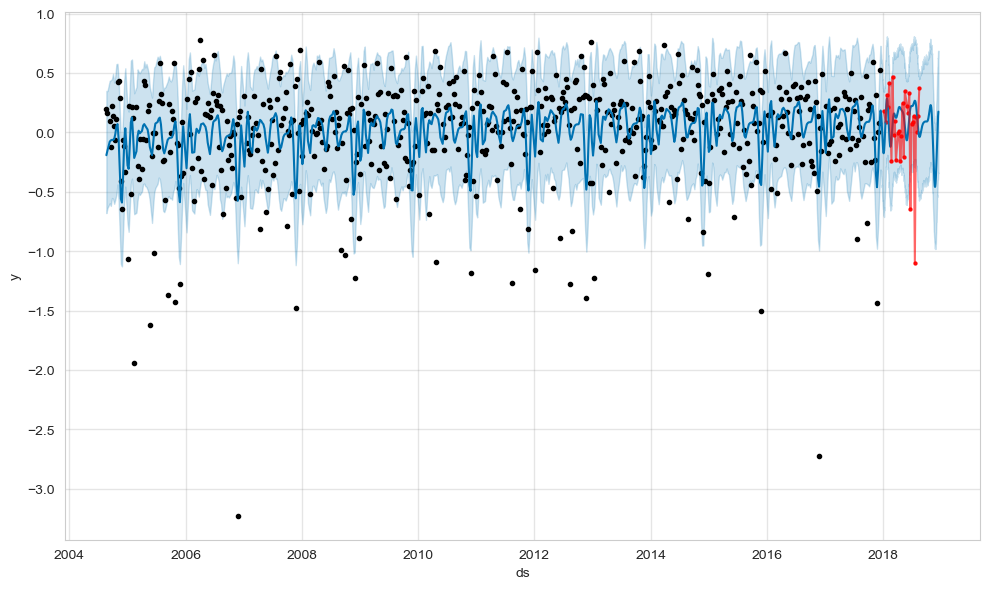

In [229]:
fig3=n.plot(forecast_vol)

plt.plot(google_test['Friday_date'],google_test['diff_vol'],alpha=0.6,color='r')
plt.scatter(google_test['Friday_date'],google_test['diff_vol'],s=4.5,alpha=0.9,color='r')
plt.show()

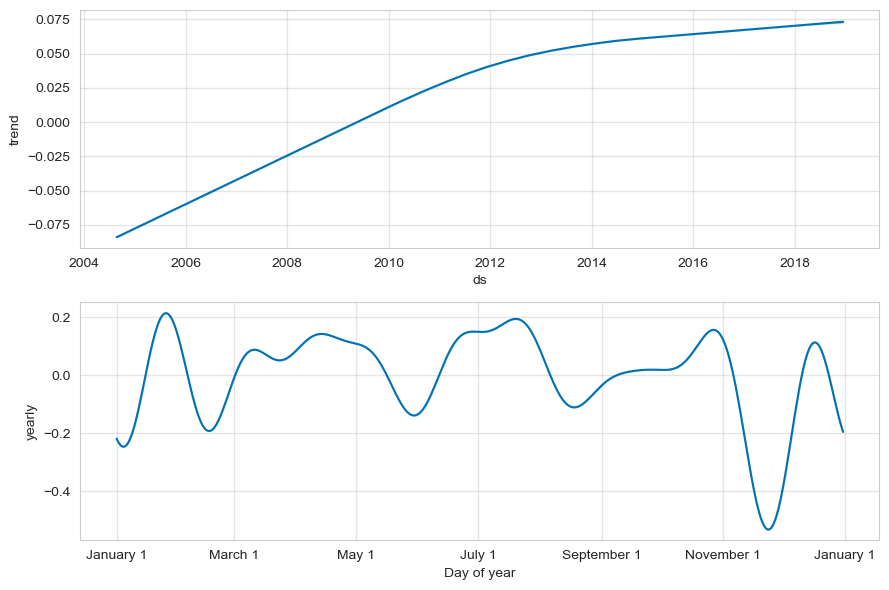

In [224]:
fig4=n.plot_components(forecast_vol)

### Consumer Services

In [33]:
consumer=pd.read_csv('data/Weekends_Consumer_Stocks.csv')

In [34]:
consumer['diff_fomc'] = (consumer['Friday_open']-consumer['Monday_close'])/consumer['Friday_open']

In [35]:
consumer['diff_fcmo'] = (consumer['Friday_close']-consumer['Monday_open'])/consumer['Friday_close']

In [36]:
consumer['diff_vol'] = (consumer['Friday_volume']-consumer['Monday_volume'])/consumer['Friday_volume']

In [37]:
means=[]
stdev=[]
for diff in diffs:
    non_dst = consumer.loc[consumer.y==0][diff].values
    dst = consumer.loc[consumer.y==1][diff].values
    
    means.append([np.mean(non_dst),np.mean(dst)])
    stdev.append([np.std(non_dst),np.std(dst)])

In [38]:
# Means
pd.DataFrame(means, index= diffs, columns = ['nonDST','DST'])

nonDST       DST
diff_fomc -0.004457 -0.001353
diff_fcmo -0.003654  0.000044
diff_vol  -8.582464 -0.863043

In [39]:
# Standard Deviation
pd.DataFrame(stdev, index= diffs, columns = ['nonDST','DST'])

nonDST        DST
diff_fomc     1.397367   0.044744
diff_fcmo     1.318142   0.021917
diff_vol   5173.613152  34.262353

In [42]:
amazon=consumer[consumer['ticker']=='AMZN']

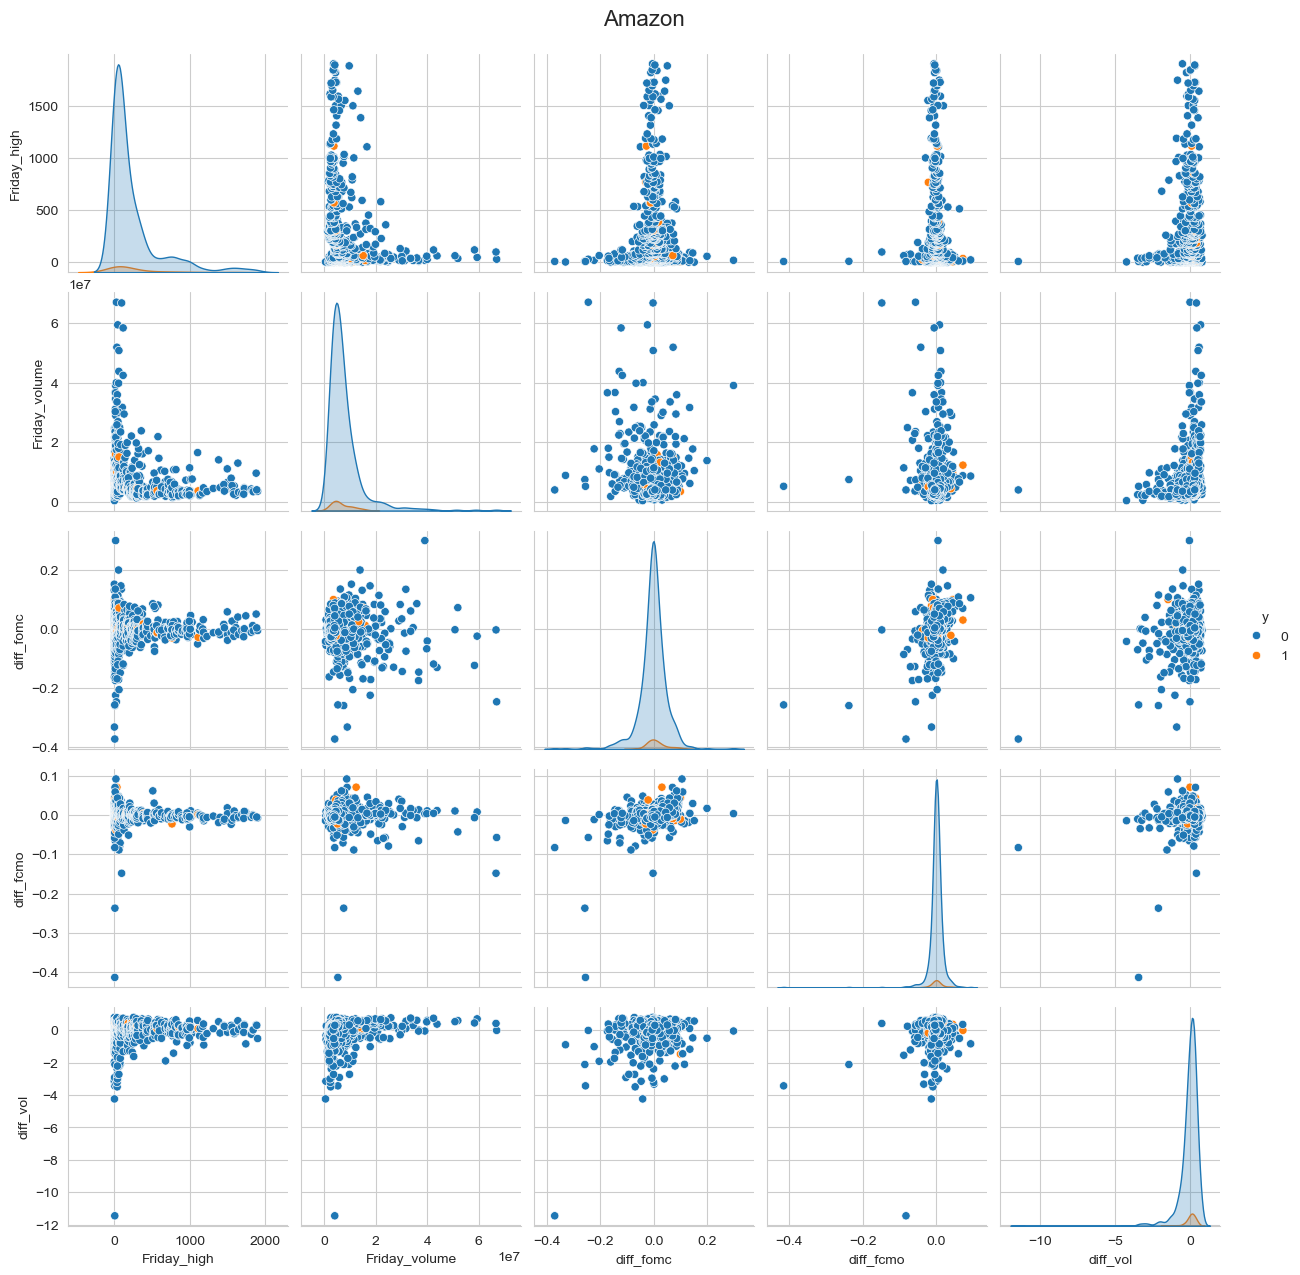

In [85]:
sns.pairplot(data = amazon,
                x_vars = trunc_metrics,
                y_vars = trunc_metrics,
                hue = 'y')
plt.suptitle("Amazon", y=1.02, fontsize=16)
plt.show()

In [73]:
mcdonald=consumer[consumer['ticker']=='MCD']

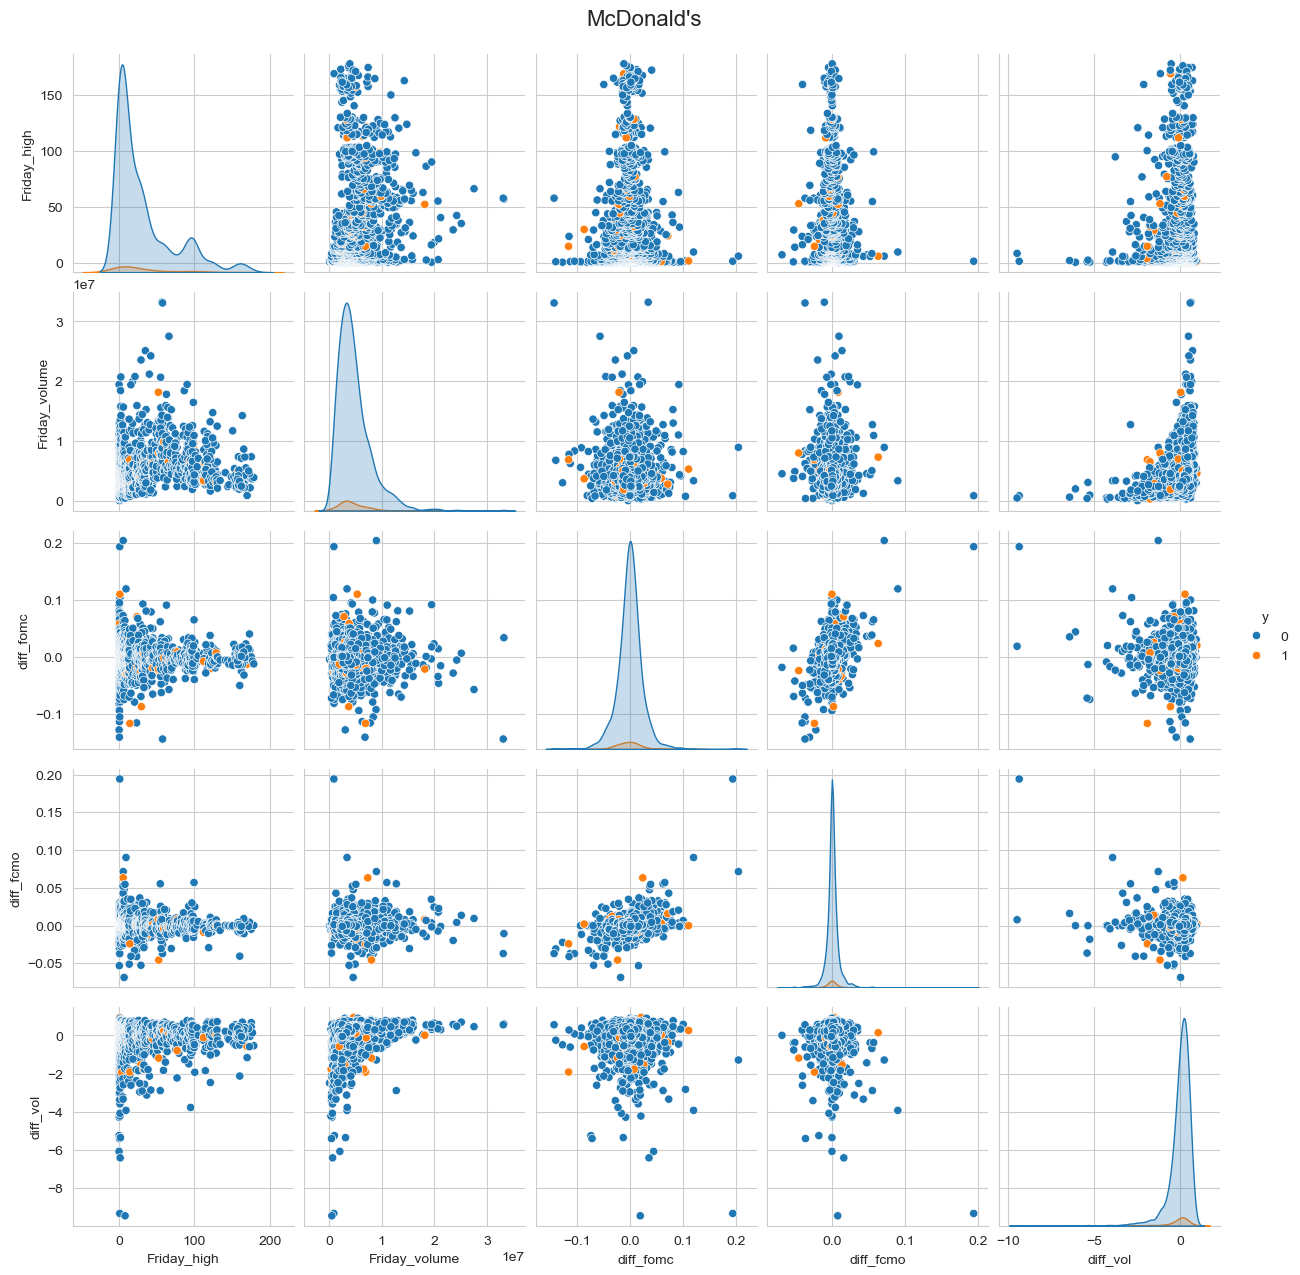

In [84]:
sns.pairplot(data = mcdonald,
                x_vars = trunc_metrics,
                y_vars = trunc_metrics,
                hue = 'y')
plt.suptitle("McDonald's", y=1.02, fontsize=16)
plt.show()

In [77]:
disney=consumer[consumer['ticker']=='DIS']

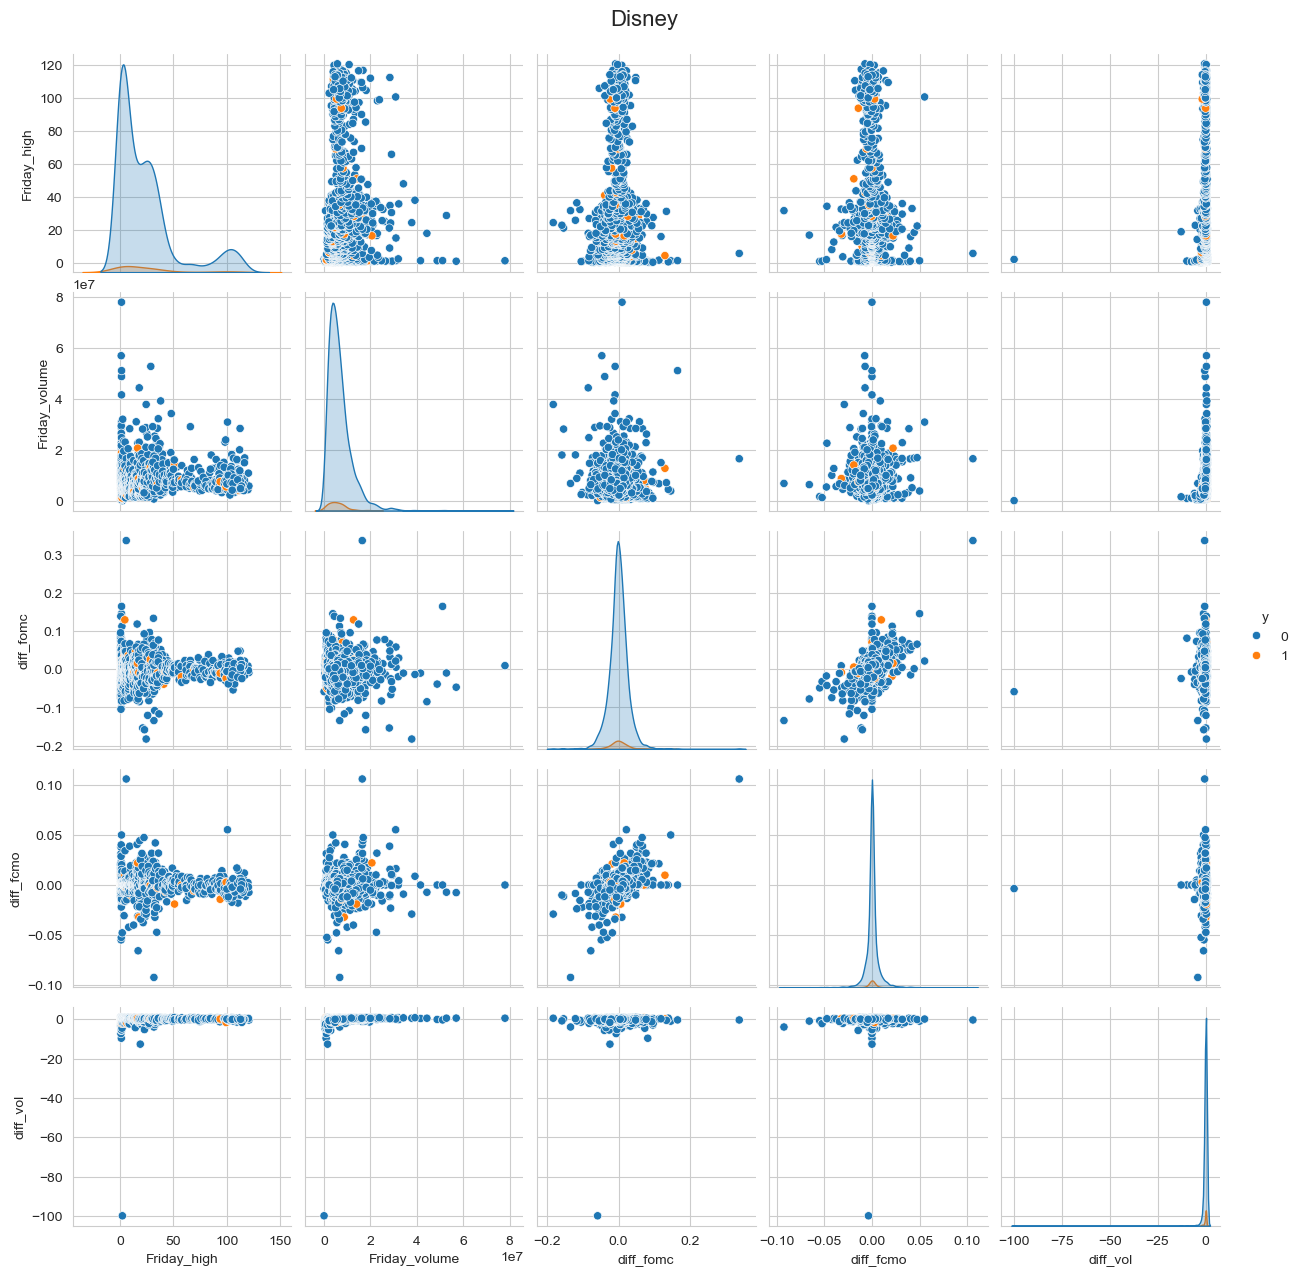

In [82]:
sns.pairplot(data = disney,
                x_vars = trunc_metrics,
                y_vars = trunc_metrics,
                hue = 'y')
plt.suptitle("Disney", y=1.02, fontsize=16)
plt.show()

In [78]:
starbucks=consumer[consumer['ticker']=='SBUX']

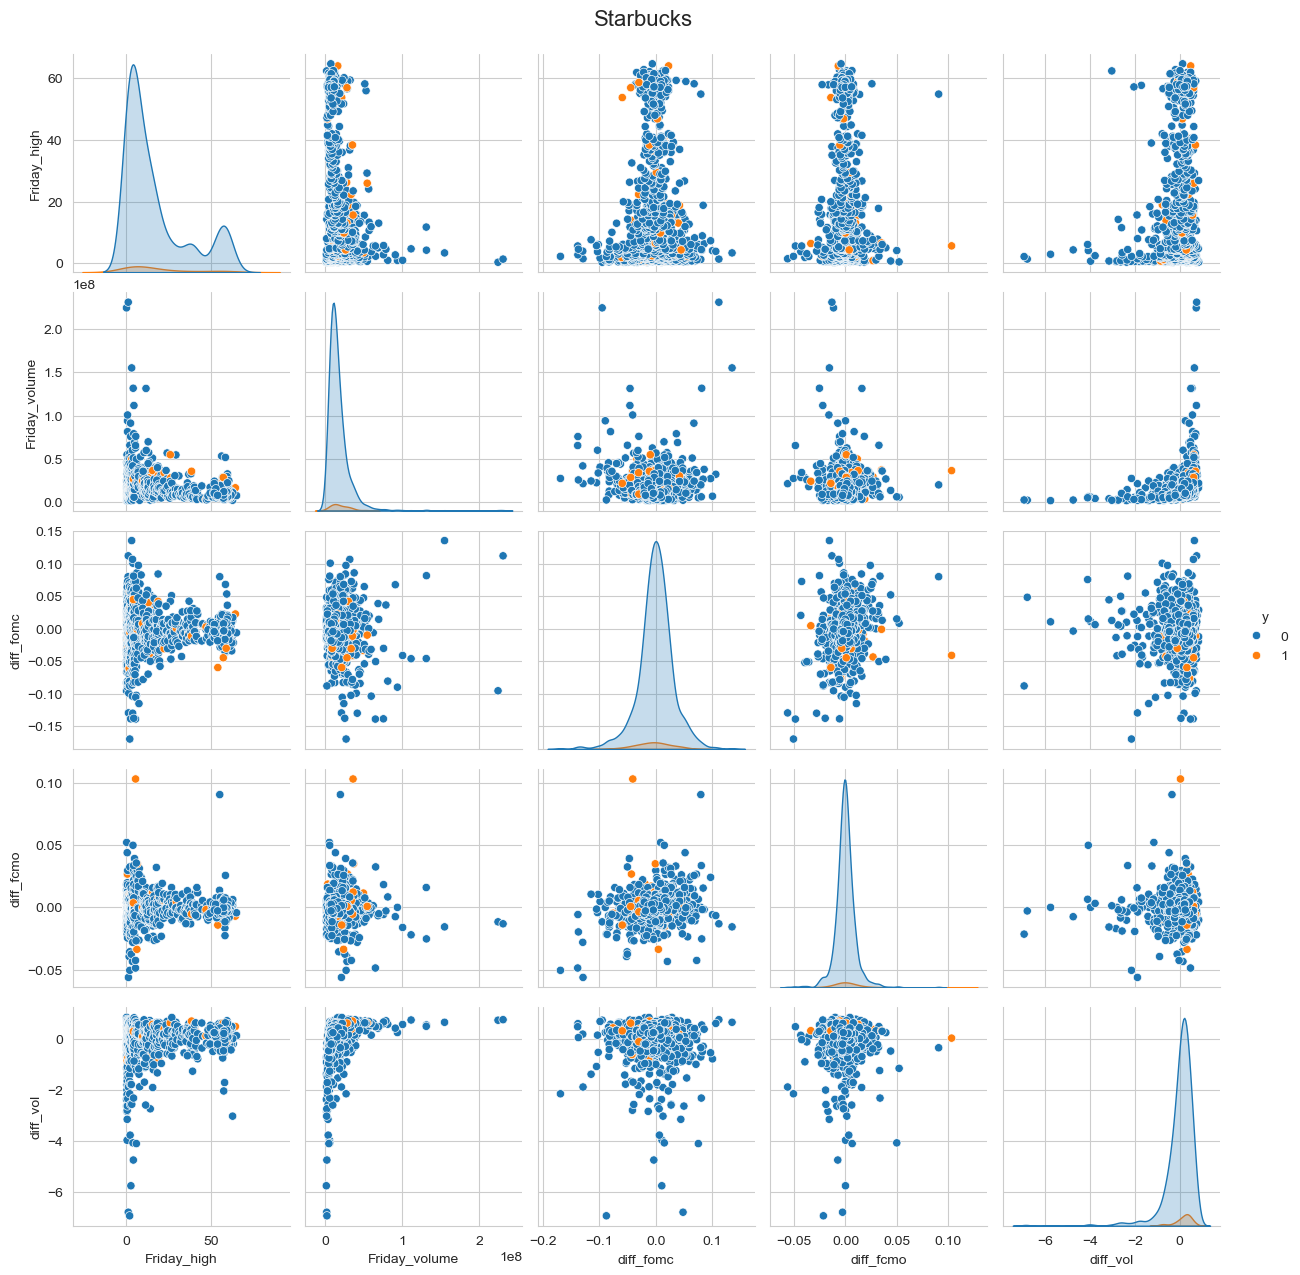

In [83]:
sns.pairplot(data = starbucks,
                x_vars = trunc_metrics,
                y_vars = trunc_metrics,
                hue = 'y')
plt.suptitle("Starbucks", y=1.02, fontsize=16)
plt.show()